### Experiment-6

In [46]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531

In [47]:
# A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

In [48]:
# Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

In [49]:
# Importing Libraries
import pandas as pd
import numpy as np
import math
import random 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

import seaborn as sns
import statsmodels.api as sm


In [50]:
# Importing the dataset
dataset = pd.read_csv("Datasets\diabetes_id3.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [51]:
# info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [52]:
# Shape of Dataset
dataset.shape

(768, 9)

In [53]:
# Initializing the Dataset in X and Y values
X = dataset.drop("Outcome", axis=1)
Y = dataset[["Outcome"]]

In [54]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [55]:
# Fitting the Gaussian Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred = model.predict(X_test)

In [57]:
# Printing the accuracy of the model
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7835497835497836


In [58]:
# Calculating the Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix for the Model:  ")
cnf_matrix


Confusion Matrix for the Model:  


array([[128,  18],
       [ 32,  53]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

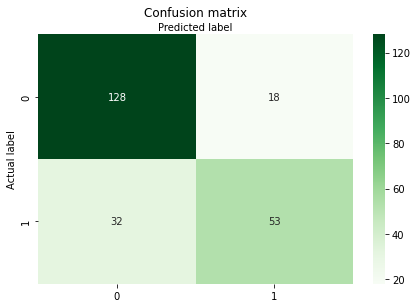

In [59]:
# Visualization of Confusion matrix
class_names=[0,1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# TN FP
# FN TP

In [60]:
# Printing the Classification report
target_names = ['Diabetes Negative', 'Diabetes Positive']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

Diabetes Negative       0.80      0.88      0.84       146
Diabetes Positive       0.75      0.62      0.68        85

         accuracy                           0.78       231
        macro avg       0.77      0.75      0.76       231
     weighted avg       0.78      0.78      0.78       231



### Another Approach without Sklearn

In [79]:
import csv 
import random 
import math

In [80]:
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

In [81]:
def loadcsv(filename):
	lines = csv.reader(open(filename, "r"))
	dataset = list(lines)
	for i in range(len(dataset)):
		dataset[i] = [float(x) for x in dataset[i]]
	return dataset

In [82]:
def splitdataset(dataset, splitratio):
	trainsize = int(len(dataset) * splitratio)
	# 67% training size	 trainsize = int(len(dataset) * splitratio);
	trainset = []
	copy = list(dataset);
	while len(trainset) < trainsize:
		index = random.randrange(len(copy)); trainset.append(copy.pop(index))
		trainset.append(copy.pop(index))
	return [trainset, copy]

In [83]:
def separatebyclass(dataset):
	separated = {}  # dictionary of classes 1 and 0
	for i in range(len(dataset)): 
		vector = dataset[i]
		if (vector[-1] not in separated): 
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector) 
	return separated

In [84]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))


def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg, 2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)

In [85]:
# creates a dictionary of classes 
def summarize(dataset):
	summaries	=	[(mean(attribute),	stdev(attribute)) for attribute in zip(*dataset)];
	del summaries[-1] #excluding labels +ve or -ve 
	return summaries

In [86]:
def summarizebyclass(dataset):
	separated= separatebyclass(dataset);  # print(separated)
	summaries = {}
	for classvalue, instances in separated.items():
		summaries[classvalue]= summarize(instances)  # summarize is used to cal to mean and std
	return summaries

In [87]:
def calculateprobability(x, mean, stdev): 
	exponent = math.exp(-(math.pow(x-mean, 2) /(2*math.pow(stdev, 2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [88]:
def calculateclassprobabilities(summaries, inputvector):
# probabilities contains the all prob of all class of test data 
	probabilities = {}
	for classvalue, classsummaries in summaries.items():  # class and attribute information as mean and sd
		probabilities[classvalue] = 1
		for i in range(len(classsummaries)):
			mean, stdev= classsummaries[i]  # take mean and sd of every attribute for class 0 and 1 seperaely
			x= inputvector[i]  # testvector's first attribute 
			probabilities[classvalue] *= calculateprobability(x, mean, stdev);  # use normal dist 
	return probabilities

In [89]:
def predict(summaries, inputvector):  # training and test data is passed
	probabilities = calculateclassprobabilities(summaries, inputvector)
	bestLabel, bestProb = None, -1
	for classvalue, probability in probabilities.items():  # assigns that class which has the highest prob
		if bestLabel is None or probability > bestProb: 
			bestProb = probability
			bestLabel = classvalue 
	return bestLabel

In [90]:
def getpredictions(summaries, testset): 
	predictions = []
	for i in range(len(testset)):
		result = predict(summaries, testset[i]) 
		predictions.append(result)
	return predictions

In [91]:
def getaccuracy(testset, predictions): 
	correct = 0
	for i in range(len(testset)):
		if testset[i][-1] == predictions[i]: 
			correct += 1
	return (correct/float(len(testset))) * 100.0

In [92]:
def main():
    filename = 'Datasets\diabetes_NB.csv'
    splitRatio = 0.70
    dataset = loadcsv(filename)
    trainingSet, testSet = splitdataset(dataset, splitRatio)
    print('Split {0} rows into'.format(len(dataset)))

    print('Number of Training data: ' + (repr(len(trainingSet))))
    print('Number of Test Data: ' + (repr(len(testSet))))

    # prepare model
    summaries = summarizebyclass(trainingSet)
    # test model
    predictions = getpredictions(summaries, testSet)
    actual = []
    for i in range(len(testSet)):
        vector = testSet[i]
        actual.append(vector[-1])
    accuracy = getaccuracy(testSet, predictions)
    print('Accuracy: {0}%'.format(accuracy))

In [93]:
main()

Split 768 rows into
Number of Training data: 538
Number of Test Data: 230
Accuracy: 72.17391304347827%
